# Root finding methods

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

# Introduction to root finding

This chapter is an introduction to root finding methods. Many problems in engineering and science boil down to find the root of a function. In general, we need to find the roots $x$ of a function $f(x)$ such that
\begin{equation}
f(x) = 0
\end{equation}


## Example applications in CEE
For some functions $f(x)$, we have analysitical solutions for their roots. For example, the roots of quadratic functions.
\begin{equation}
    ax^2 + bx + c = 0  \rightarrow x = \frac{-b\pm \sqrt{b^2-4ac}}{2a}
\end{equation}
where $a$, $b$ and $c$ are constants. However, most can NOT or are very hard to be solved analytically, e.g., the normal depth $y_n$ using the Manning's equation for open channel flows:
\begin{equation}
	Q = \frac{k_n}{n} A({y_n}) R({y_n})^{2/3} S_0^{1/2}
\end{equation}	    
In the flood water depth prediction, for a given design discharge flow $Q$, building material which determines the Manning's roughness $n$, the channel slope $S_0$, and the geometry of the channel cross section which determines the functional relationship for area $A$ and hydraulic radius $R$, the goal is to calculate $y_n$. Due to the nonlinearity of the functions $A(y_n)$ and $R(y_n)$, $y_n$ can not be solved analytically. 

<img src="natural_channel_cross_section.png" width="400"/>
<h3 align="center">Figure. Open channel cross section.</h3> 

Another example is the calculation of head loss $h_f$ in pipes. From fluid mechanics, we know the head loss due to friction in pipes can be calculated as follows:
\begin{equation}
 h_f = f_D \frac{L}{D}\frac{V^2}{2g}
 \end{equation}
where $f_D$ is the dimensionless Darcy friction factor, $L$ is the pipe (or channel) length, $D$ is the hydraulic diameter (=$4A/P$ with $A$ being the cross-sectional area and $P$ being the wetted perimeter), and $V$ is the mean velocity. The Darcy friction factor can be either read from the Moody diagram (as shown in the figure below) or using the Colebrook-White equation:
\begin{equation}
\frac{1}{\sqrt{{f_D}}} = -2 \log \left(\frac{\epsilon}{3.7 D} + \frac{2.51}{Re \sqrt{{f_D}}} \right)
\end{equation} 
where $\epsilon$ is the roughness height of the pipe and $Re$ is the Reynolds number. For given $\epsilon$ and $Re$, the equation above is nonlinear, implicit equation for $f_D$ whose value can only be sought numerically. 

<img src="moody.png" width="600"/>
<h3 align="center">Figure. Moody diagram for friction factor.</h3> 

The next example is from structure analysis for beam deflection. A beam is fixed on one end and the other end is free to move. A uniformly varying load $\omega(x)$ is applied to the beam as
\begin{equation}
 \omega(x) = \frac{\omega_0}{L} (L-x)
\end{equation}
where $x$ is the coordinate along the beam, $\omega_0$ is a constant and $L$ is the lenght of the beam. The deflection along $x$ has the form of 
\begin{equation}
y(x) = \frac{\omega_0 x^2}{120 L E I} \left(10 L^3 - 10L^2x + 5Lx^2-x^3  \right)
\end{equation} 
where $E$ is the modulus of elasticity, $I$ is the moment of inertia. For a given $x$ location, the deflection $y$ can be directly calculated. However, if the question is to find the location $x$ for a given deflection, we need to solve for the roots of the above third-order polynomial for $x$. In fact, the roots of a third-order polynomial can be solved analyticlly using the cubic formula. However, that formula is long. Numerical approximation is sometime more convenient.  

<img src="simple_beam.png" width="400"/>
<h3 align="center">Figure. Simple beam under uniformly varying load.</h3> 


The objectives of this chapter are to:
* understand what roots problems are and where they occur in engineering and science
* know equation classification
* understand the incremental search method and its shortcomings
* know how to solve a roots problem with the bisection method
* know how to estimate the error of bisection
* recognize the difference between bracketing and open methods 
* know how to solve a roots problem with the Newton-Raphson method 
* know how to solve a roots problem with the secant methods
* know Built-in Python functions for root finding 
---

# Equation classification

By definition, we are seeking the roots of equations, which have different forms and types. A classification of equations is then a good starting point for our discussion. The following figure shows how equations are classified.

<img src="equation_classification.png" alt="equations" width="400"/>

The first big category is the algebraic equations, which are made of terms through algebraic operations, such as addition, subtraction, multiplication, division, and raising to a power. An important example of algebraic equation is the polynomial equations. Equations involving nonalgebraic operations, such as trigonometric, exponential and logarithmic functions, are called transcendental equations. 

Some of these equations have analytical solutions, for example linear, quadratic, and even cubic equations. However, in many other engineering applications, the equations are generally nonlinear and have no easy way to find analytical solutions. The following is a short discussion on some facts about equations. 

## Linear vs nonlinear equations
* Linear equation: independent variable raised to first power only
    * Standard form: $f(x) = ax + b = 0$ $(a!=0)$
    * Examples: $7x -6 =0$; $x/3 = -8$; $8x – 3 = 5x + 4$, all can be rearranged to the standard form: $ax + b = 0$
    * Linear equations with 1 independent variable can be solved exactly and analytically. They have 1 real root.

* Nonlinear: all equations
    * For example, independent variables raised to other powers: $x^2+x^{1/2}=0$; invovling nonlinear functions: $\sin(x)+\log(x) = 0$
    * Nonlinear equations can have multiple roots or no root at all
    * They can have real and imaginary roots
    * Analytical solution may not exist, except in special cases
    
## Polynomial vs general nonlinear
* Polynomial contains natural powers (0, 1, 2, 3 ...) and constants
    * They have standard form as $f(x) = a_n x_n + a_{n-1} x_{n-1} + a_{n-2} x_{n-2} + ... +a_1 x + a_0$, where $a_0$ to an are constants.
    * One example is $6x^3 – 3x^2 - 11x +4 = 0$
    * The Order of a polynomial is the highest power when in standard form
    * The Order of a polynomial defines the maximum number of real roots. A $n$-th order polynomial has at most $n$ real roots.
    * There are some special case polynomials worth mentioning. For example, the 2nd-order polynomial (quadratic equations), whose solution can be found exactly and analytically. 
    * Higher order polynomials generally must be solved numerically or graphically
    
* General nonlinear equations are those other than polynomial equations. For examply, they may have non integer powers, nonlinear functions, etc. 
    * No general conclusion on the number of roots. 
    * They have to be solved numerically.

       
## Root finding methods

In the following, we will introduce methods to find estimation/approximation to the roots of equations. Before we begin, here are some general comments. Except the graphical method, all other methods are iterative. In an iterative scheme, the goal is to improve the approximation (closer to the true solution) with each iteration. Therefore, we need to set the desired accuracy (stopping criterion for iterations). At each iteration, the error needs to be checked and compared with the set criterion. If the error falls below the criterion, the approximation is good enough. In this scenario, the iteration converged and can be stopped. Otherwise, go the next iteration. Not all iterations will converge. Some may diverge (the approximation goes farther away from the solution) or oscillate (the approximation jumps around the solution). Whether an iterative scheme will converge, diverge, or oscillate depends on the computing algorithm, the characteristics of the problem being solved, and the starting point of the iteration. 

To check whether an iteration converges or not, we need to properly define and calculate the iteration error. Theoretically, we need to calculate the absolute value of $|f(x)|$, i.e., how far away from 0 is $f(x)$. If $x$ is a root, $f(x)$ should approach to 0. Another more oftern used way is to calculate the relative error between sucessive iterations $i$ and $i+1$, i.e., $|(x_{i+1}-x_i)/x_{i+1}|$. If the algorithm converges, this should approach to 0.

There are many ways to find the roots. The following lists those to be covered in this chapter. Graphical method uses the graph of a function $f(x)$ and examine its intersections with the $x$ axis. The two categories of iterative schemes are bracketing methods and open methods, which are based on different ideas. 

- Graphical method
- Bracketing methods
    * Bisection method
    * False-position method
- Open methods
    * Fixed-point iteration method
    * Newton-Raphson method
    * Secant method
    
<img src="root_finding_methods.png" width="600"/>    
    
As you will see in this chapter, there are quite a few choices for finding roots. In reality, the following questions should be kept in mind when considering different root finding methods: 
* How accurate is the method? 
* How expensive is it? 
* How many guess are needed?

In [3]:
#Do not change this cell. It is for setting up things.

%matplotlib inline

#import the preamble in the parent directory
import sys
sys.path.append("../../")
import preamble

# Graphical method

Graphical method is the simplest method among all. The method requires you to make a plot of the function f(x) and observe where it crosses the x-axis. It is of course not accurate. However, the graphical method has great value for the following uses. First, graphing the function can indicate how many roots exist and where they may be. These crude estimations can be used as the starting points for other methods. Graphical method can also be used to identify why and where some root-finding methods may fail.

The following figure shows the graphical method. Several cases are shown where there is no root, one root, two roots, three roots, or double roots. In that order, the functions are:
\begin{eqnarray}
f_1(x) &=& (x-2)^2 +1 \\
f_2(x) &=& x^2 -7 \\
f_3(x) &=& (x-2)^2 -1 \\
f_4(x) &=& -x^3 +5x^2-2 \\
f_5(x) &=& (x-2)^2 
\end{eqnarray}

<img src="graphical_root_finding.png" width="600"/>
<h3 align="center">Figure. Graphical method for root finding.</h3> 

The figure can be generated with the following Python code. 

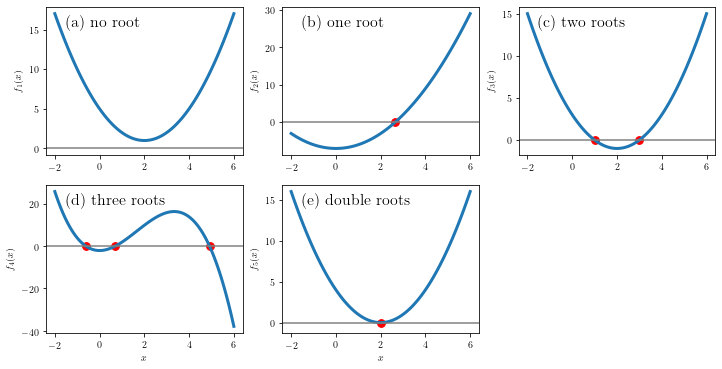

In [14]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#define the polynomial function whose coefficients
#are optional parameters
def fun1(x):
    return  (x-2) ** 2 + 1.0

def fun2(x):
    return  x ** 2 - 7.0

def fun3(x):
    return  (x-2) ** 2 - 1.0

def fun4(x):
    return  -(x)**3 + 5.0*x**2-2

def fun5(x):
    return  (x-2) ** 2

#find the roots with the "root" function in scipy
sol2 = optimize.root(fun2,[2.0])  
sol3 = optimize.root(fun3,[1.0, 3.0])  
sol4 = optimize.root(fun4,[-1.0, 1.0, 5.0])  
sol5 = optimize.root(fun5,[2.0]) 

fig, ax = plt.subplots(2,3,figsize=(12,6))

#plot the function
x = np.linspace(-2, 6, 100)
ax[0,0].plot(x, fun1(x), label=r'$f_1(x)$', lw=3)
ax[0,0].set_ylabel(r"$f_1(x)$")
ax[0,0].axhline(0, color='gray', lw=1.5)

ax[0,1].plot(x, fun2(x), label=r'$f_2(x)$', lw=3)
ax[0,1].axhline(0, color='gray', lw=1.5)
ax[0,1].set_ylabel(r"$f_2(x)$")

ax[0,2].plot(x, fun3(x), label=r'$f_3(x)$', lw=3)
ax[0,2].axhline(0, color='gray', lw=1.5)
ax[0,2].set_ylabel(r"$f_3(x)$")

ax[1,0].plot(x, fun4(x), label=r'$f_4(x)$', lw=3)
ax[1,0].axhline(0, color='gray', lw=1.5)
ax[1,0].set_xlabel(r"$x$")
ax[1,0].set_ylabel(r"$f_4(x)$")

ax[1,1].plot(x, fun5(x), label=r'$f_5(x)$', lw=3)
ax[1,1].axhline(0, color='gray', lw=1.5)
ax[1,1].set_xlabel(r"$x$")
ax[1,1].set_ylabel(r"$f_5(x)$")

#plot the roots as scatter
#ax[0].scatter(sol1.x, fun(sol1.x), color="red",s=60, label=r'roots')
ax[0,1].scatter(sol2.x, fun2(sol2.x), color="red",s=60, label=r'roots')
ax[0,2].scatter(sol3.x, fun3(sol3.x), color="red",s=60, label=r'roots')
ax[1,0].scatter(sol4.x, fun4(sol4.x), color="red",s=60, label=r'roots')
ax[1,1].scatter(sol5.x, fun5(sol5.x), color="red",s=60, label=r'roots')

ax[0,0].text(0.1, 0.95, '(a) no root', transform=ax[0,0].transAxes, fontsize=16, va='top')
ax[0,1].text(0.1, 0.95, '(b) one root', transform=ax[0,1].transAxes, fontsize=16, va='top')
ax[0,2].text(0.1, 0.95, '(c) two roots', transform=ax[0,2].transAxes, fontsize=16, va='top')
ax[1,0].text(0.1, 0.95, '(d) three roots', transform=ax[1,0].transAxes, fontsize=16, va='top')
ax[1,1].text(0.1, 0.95, '(e) double roots', transform=ax[1,1].transAxes, fontsize=16, va='top')

#remove the empty subplot on the lower left corner. 
fig.delaxes(ax.flatten()[5])

#save the plot to file
#plt.savefig("graphical_root_finding.png",dpi=300, bbox_inches='tight', pad_inches=0)

#show the plot
plt.show()

# Bracketing methods
The general idea of bracketing method is as follows. 
- Make two initial guesses that “bracket” the root - that is, are on either side of the root.
- Brackets are formed by finding two guesses $x_l$ and $x_u$ where the sign of the function changes; that is, where $f(x_l) \times f(x_u )$ < 0
- If we continuously (iteratively) reduce the bracket size, we gradually approach the root. 

<img src="bracketing_method.png" width="600"/>
<h3 align="center">Figure. Bracketing method.</h3> 

There are at least two different methods to reduce the size of bracket. One is the incremental search method and the other is the bisection method. 

## Incremental search method

The basic algorithm of incremental search method is as follows:
- Find an initial bracket which contains the root.
- Divide the bracket into a number of subintervals.
- Test the value of the function at each subinterval and find the one(s) where the function sign changes on its two ends.
- Select the subinterval where function sign changes and repeat the refinement process until the root is sufficiently accurate. 

The incremental search method, though simple, has severe drawbacks. 
- It is time consuming if the number of subintervals is large (i.e., the subinterval length is small).
- There is no optimal way to select subintervals for sign testing with priority. In other words, all subintervals are treated equally because the incremental search method does not consider any information regarding which subintervals are more likely to contain the roots.  
- If the spacing between the points of an incremental search are too far apart, brackets may miss some roots.

<img src="bracketing_method_large_interval.png" width="600"/>
<h3 align="center">Figure. Bracketing method with too large interval and missing roots.</h3> 

- Incremental searches cannot find brackets containing even-multiplicity roots regardless of spacing. For example, for a double roots case in the previous figure, since the signs on the two ends of a bracket are the same, it will dismiss this bracket as not containing any root.

Due to above reasons, incremental search method is rarely used in practice. 

## Bisection method

Bisection section method always reduces a bracket's size to half and that is the origin of the name. The algorithm goes like this:
- If a function changes sign over an interval (bracket), the function value at the midpoint is evaluated.
- The location of the root is then determined as lying within the subinterval where the sign change occurs.
- The absolute error is reduced by a factor of 2 for each iteration.
- The bisection process continues until the size of the bracket is sufficiently small.

The algorithm can be described with the following figure. 
<img src="bisection.png" width="600"/>
<h3 align="center">Figure. Algorithm for the bisection method.</h3> 

### A hand-calculation example
Before we discuss how to implement the bisection method, it is very benefitial to do a hand-calculation example. With the step-by-step calculation, the concept will be much clear. For scientific computing in general, hand-calculation with a simple example can be used by a programmer to check against the code. In this sense, hand-calculation has great value and may help identify bugs in code. To get rid of errors (bugs) in a code, you can use an extremely simple case to test your code by step-by-step debugging and comparing with your hand calculation. 

In this example, use the bisection method to find the root of 
\begin{equation*}
  f(x) = x^2 - 7    \quad  x \in (1,6)
\end{equation*}


The algorithm can be described with the following figure. 
<img src="bisection_manual_example_solution.png" width="600"/>
<h3 align="center">Figure. Bisection method hand-calculation example.</h3> 

After three iterations, the relative error is reduced to about 22\%. The iteration can continue to further reduce the error. 

The following Python code implements the bisection method. In addition, it uses the animation functionality of Python to dynamically show how the bisection method works. Indeed, the first cell below generates an animation file and the following cell plays that.

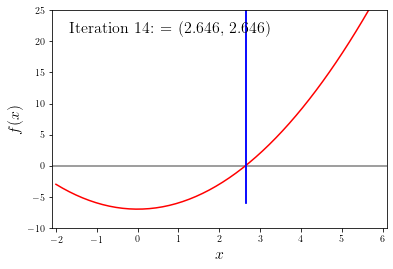

In [15]:
#Note: this cell needs the "ffmpeg" package
#https://anaconda.org/conda-forge/ffmpeg
#ffmpeg on anaconda can be installed with
# conda install -c conda-forge ffmpeg 

import matplotlib.pyplot as plt 
from matplotlib import animation
import numpy as np 
from IPython.display import HTML

#a function return the sign of x
def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

#bisect the range (a, b) based on the signs
#of f(a), f(b) and f((a+b)/2)
def bisect(f,a,b):
    fa = f(a)
    fb = f(b)
    p = (a+b)/2.0
    fp = f(p)
    if sgn(fa) == sgn(fp):
        return p, b
    else:
        return a, p

#call the bisection method for n iterations
def bisection_iterations(f,a,b,n):
    for i in range(n):
        a,b = bisect(f,a,b)
    return a,b

def f(x):
    return x**2-7.0

xmin, xmax = 1, 6
yrange = f(xmin), f(xmax)
ymin, ymax = min(yrange), max(yrange) 
vf = np.vectorize(f)
x = np.linspace(-2.0,6.0)
y = vf(x)
epsilon = 0.1

# Initialize figure
fig = plt.figure()
ax = plt.axes(xlim=(-2-epsilon,6+epsilon), ylim=(-10,25))
plt.axhline(0, color='gray', lw=1.5)
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$f(x)$',fontsize=16)
curve, = ax.plot([],[], color='red')
left, = ax.plot([],[],color='blue')
right, = ax.plot([],[],color='blue')
txt = ax.text(0.05, 0.95, ' ', transform=ax.transAxes, fontsize=16, va='top')

# Figure reset between frames
def init():
    left.set_data([],[])
    right.set_data([],[])
    curve.set_data([],[])
    txt.set_text('')
    return left, right, curve, txt

# Animation of bisection
def animate(i):
    a, b = bisection_iterations(f,xmin,xmax,i)
    left.set_data([a,a],[ymin,ymax])
    right.set_data([b,b],[ymin,ymax])
    curve.set_data(x,y)
    txt.set_text('Iteration %d: = (%.3f, %.3f)' % (i, a, b))
    return left, right, curve, txt

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=15, interval=700, blit=True)

#save the animation to file
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=5400)
anim.save('bisection_method.mp4', writer=writer)

In [7]:
#show the animation generated from the cell above.
HTML(anim.to_html5_video())

### Error and accuracy of bisection method

The absolute error of the bisection method is solely dependent on the absolute error at the start of the process (the space between the two guesses) and the number of iterations. Assume the initial error is
\begin{equation}
   \Delta x^0 = x_u^0 -x_l^0
\end{equation}
then, after $n$ iterations, the error becomes
\begin{equation}
     E_a^n = \frac{\Delta x^0}{2^n}
\end{equation}
So the required number of iterations to obtain a desired absolute error $E_{a,d}$ can be calculated based on the initial guesses as

\begin{equation}
   n = \frac{\Delta x^0}{E_{a,d}}
\end{equation}
You can easily adapt the bisection method Python code above to check this fact.

A question for the reader: Does the bisection method work for double roots? Why? I will not give the answer here. You can think about and/or try the Python code above with the double roots example in the introduction part of this chapter. 

## False position method
The bisection method is kind of "brute-force" which does not take into considerations on the properties of the function except the sign of on the two bounds of the bracket. It thus may not be efficient. An alternative method, which takes into account the value of $f(x_l)$ and $f(x_u)$. Intuitively, for example, if $f(x_u)$ is closer to zero, then the real root may be closer to $x_u$ than $x_l$. And vice versa. This alternative is called the false-position method where the curve of the function on the bracket is approximated as a straight line. The intersection of the straight line with the $x$ axis is the new (and hopefully better) estimate for $x_r$ (instead of $x_r=(x_l+x_u)/2$ in the bisection method).

<img src="false_position_method.png" width="300"/>
<h3 align="center">Figure. False position method.</h3>

The performance of the false-position method is usually superior than the bisection method. However, the statement can not be generalized because there are always exceptions. The weakness of the false-position method lies in the fact that it is one-sided, i.e., one end of the bracketing points may stay fixed. False-position| method performs very poorly in areas where the function $f(x)$ has significant curvature. For example, the following figure sketches the function $f(x)=1-x^{10}$, which has very large curvature near the root $x$ = 1. As can be seen in the figure, the improvement of root estimate is very slow (blue dots in the figure).

<img src="pitfall_false_position_method.png" width="300"/>
<h3 align="center">Figure. Limitation of false position method.</h3> 



# Open methods

* Open methods require only a single starting value or two starting values that do not necessarily bracket a root.
* Open methods may diverge as the computation progresses, but when they do converge, they usually do so much faster than bracketing methods.

## Fixed-point iteration method
This is probably the simplest open method for root findng.



The following code uses the fixed-point iteration method to solve the equation 
\begin{equation}
 f(x) = e^{-x} - x = 0
\end{equation}

One formula for the fixed point iteration is
\begin{equation}
x_{i+1} = e^{-x_i}
\end{equation}


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sys

#define the function for root finding f(x)=0
#derive the x=g(x) function.
def g(x):
    return np.exp(-x)

#initial guess
x0 = 2.0 

#convergence criterion
epsilon = 1E-3

#maximum iteration number
Nmax=1000

N = 1
xold = x0
xnew = x0

while N <= Nmax:
    xold = xnew
    xnew = g(xold)
    
    if (abs((xold-xnew)/xnew)<epsilon): 
        print("Found one root x = ", xnew, " at iteration ", N)
        break
    
    N = N + 1
           
if(N == (Nmax+1)):
    print("Maximum iteration number ", Nmax, " reached. No root found.")
        
#end of code. It is better to give user some indication
#that the code is done.
print("Done!")

Found one root x =  0.566969808628573  at iteration  15
Done!


As a check, the following cell plot the function and the solution. 

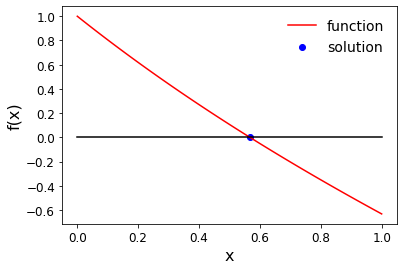

In [2]:
def f(x):
    return np.exp(-x)-x

xl, xr = 0, 1

x = np.linspace(xl,xr,100) # 100 linearly spaced numbers

y = f(x)

#scatter plot
plt.scatter(xnew, f(xnew), color='blue', marker = 'o', label='solution')

#line plot for the fitted linear curve
plt.plot(x, f(x), color='red', label='function')

#plot the f(x) = 0 line
plt.plot((xl,xr),(0,0), color='k')

#set the limit for the x and y axes
#plt.xlim([0,1.0])
#plt.ylim([5,45])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper right',fontsize=14,frameon=False)

plt.show()

### Convergence of fixed-point iteration method

Fixed-point iteration method may converge or diverge. It depends on the maginute of $|g'(x)|$ in the area of interest. For it to converge, the condition for $|g'(x)|$ < 1 should be satisfied. The mathematical proof of this condition is as follows. For the equation
\begin{equation}
x = g(x),
\end{equation}
the Taylor series expansion of the function $g(x)$ around the root $x_r$ is
\begin{equation}
g(x) = g(x_r) + (x-x_r) g'(x_0) + \ldots
\end{equation}
Since $x_r$ is a root, i.e., it satisfies $x_r = g(x_r)$. Thus, 
\begin{equation}
g(x_r) - x_r \approx g'(x_r)(x-x_r)
\end{equation}

During the iteration, let $x_i$ is the $i^{th}$ estimation, then 
\begin{equation}
x_{i+1} = g(x_i)
\end{equation}

Combine everything above, one can get
\begin{equation}
x_{i+1} - x_r \approx g'(x_r)(x_{i}-x_r)
\end{equation}
This equation shows that the distance between current estimation and the true root is multiplied by $g'(x_r)$ at each iteration. So the iteration converges if $|g'(x_r)|$ < 1 and diveges if $|g'(x_r)|$ < 1. For the case of $|g'(x_r)|$ = 1, the itration may diverge or converge (both will be slow though). 

For the convergence case of $|g'(x_r)|$ < 1, there are two sub-cases:
* 0 < $g'(x_r)$ < 1: the iteration will zigzag (staircase) towards the root (Fig. a). The path will be sandwiched between the the lines of $y=x$ and $y=g(x)$. 
* -1 < $g'(x_r)$ < 0: the iteration will spiral towards the root (Fig. b). The path will jump alternatively between the lines of $y=x$ and $y=g(x)$.

Similarly, for the diergence case of $|g'(x_r)|$ > 1, there are two sub-cases:
* $g'(x_r)$ > 1: the iteration will zigzag (staircase) away from the root (Fig. c). The path will be sandwiched between the the lines of $y=x$ and $y=g(x)$. 
* $g'(x_r)$ < -1: the iteration will spiral away from the root (Fig. d). The path will jump alternatively between the lines of $y=x$ and $y=g(x)$.

<img src="fixed_point_iteration_convergence.png" width="600"/>
<h3 align="center">Figure. Fixed point iteration convergence.</h3> 

As an example, the following code uses the fixed-point iteration method to solve the equation 
\begin{equation}
 f(x) = x^2 - 7 = 0
\end{equation}

One formula for iteration is
\begin{equation}
x_{i+1} = \frac{7}{x_i}
\end{equation}

So $g(x)=\frac{7}{x}$. Thus, 
\begin{equation}
g'(x) = -\frac{7}{x^2}
\end{equation}

The root is around 2.5. So in the area of interest, $g'(x=2.5)=-7/2.5^2$>1. The iteration will diverge. 

In [3]:
#define the function for root finding f(x)=0
#derive the x=g(x) function.
def g(x):
    return 7.0/x

#initial guess
x0 = 2

#convergence criterion
epsilon = 1E-3

#maximum iteration number
Nmax=1000

N = 1
xold = x0
xnew = x0

while N <= Nmax:
    xold = xnew
    xnew = g(xold)
    
    if (abs((xold-xnew)/xnew)<epsilon): 
        print("Found one root x = ", xnew, " at iteration ", N)
        break
    
    N = N + 1
           
if(N == (Nmax+1)):
    print("Maximum iteration number ", Nmax, " reached. No root found.")
        
#end of code. It is better to give user some indication
#that the code is done.
print("Done!")

Maximum iteration number  1000  reached. No root found.
Done!


---
The above iteration scheme failed. However, it does not mean the fixed-point iteration method is applicable for finding the roots of $f(x) = x^2 -7 = 0$. Indeed, a different formulation can be used. The equation can be equivalently written as
\begin{equation}
x = \frac{x+7}{x+1}
\end{equation}
where 
\begin{equation}
g(x) = \frac{x+7}{x+1}
\end{equation}

The root is around 2.5. In the area of interest, 
\begin{equation}
|𝑔'(𝑥=2.5)|=|-\frac{6}{(x+1)^2}|=|-\frac{6}{(2.5+1)^2}| = 0.49 < 1. 
\end{equation}
The iteration will converge. The following code shows this point.

In [4]:
#define the function for root finding f(x)=0
#derive the x=g(x) function.
def g(x):
    return (x+7.0)/(x+1.0)

#initial guess
x0 = 2

#convergence criterion
epsilon = 1E-3

#maximum iteration number
Nmax=1000

N = 1
xold = x0
xnew = x0

while N <= Nmax:
    xold = xnew
    xnew = g(xold)
    
    if (abs((xold-xnew)/xnew)<epsilon): 
        print("Found one root x = ", xnew, " at iteration ", N)
        break
    
    N = N + 1
           
if(N == (Nmax+1)):
    print("Maximum iteration number ", Nmax, " reached. No root found.")
        
#end of code. It is better to give user some indication
#that the code is done.
print("Done!")

Found one root x =  2.6463238827486784  at iteration  9
Done!


Thus, it is important to keep in mind that when developping the fixed-point iteration schemes, the scheme is not unique. One should choose the scheme which has $|g'(x)|$<1.

## Newton's method

* Start with a guess $x$
* Form the tangent line to the $f(x)$ curve at the guess $x$
* Follow the tangent line to where it crosses the x-axis. The crossing point is usually an improved estimate of the root. 

The Newton method or Newton-Raphson method can be derived from Taylor series expansion or from the following graph. At a given point $x_i$, the derivative of the function can be approximated as 
\begin{equation}
   f'(x_i) = \frac{f(x_i) - 0}{x_i - x_{i+1}}
\end{equation}
thus we can re-arrange this equation to get formula for $x_{i+1}$, hopefully an improved estimate of the root:
\begin{equation}
  x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
\end{equation}
This is the iterative formula for the Newton's method, which needs an initial guess to start with and at every iteration, it needs to evaluate the function value and its derivative. 

<img src="Newton_method.png" alt="Newton" width="400"/>

The whole process can be illustrated with the following interactive plot. Use your mouse to drag the iteration slider slowly and see how the tangent line and crossing point evolve toward the root. 

In [2]:
#source: https://github.com/markjay4k/fourier-transform

import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(order):
    x_n = 2
    ax.clear()
    ax.plot(x, f(x), label=r'$\ln(x)$')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 2.2)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.legend(loc=4)
    plt.show()

interactive(children=(IntSlider(value=1, description='Iterations', max=6, min=1), Output()), _dom_classes=('wi…

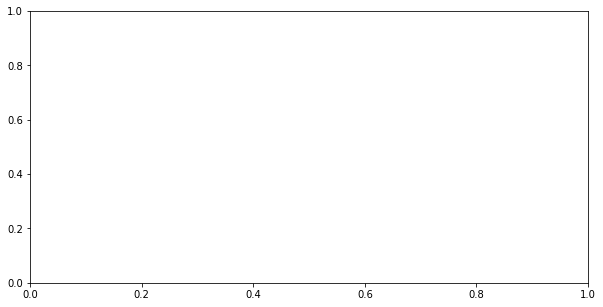

In [3]:
fig, ax = plt.subplots(1, figsize=(10, 5))
order = widgets.IntSlider(min=1, max=6, value=1, description='Iterations')
widgets.interactive(update_plot, order=order)

A more concise example of Newton-Raphson implementation is as follows. To use it for your own problem, you need to redefine the function and its derivative.

In [4]:
#define the function
def f(x):
    return x**2-16.0
 
#define the derivative
def df(x):
    return 2.0*x
 
def Newton_Raphson_method(f, x0, eps):
    delta = abs(0-f(x0))
    while delta > eps:
        x0 = x0 - f(x0)/df(x0)
        delta = abs(0-f(x0))
    print('Found a root at: ', x0, ' with f(x) = ', f(x0))

#now use the Newton-Raphson method
eps = 1e-6      #absolute convergence tolerance
x0s = [-3, 5]   #initial guesses (should be reasonable)
for x0 in x0s:
    Newton_Raphson_method(f, x0, 1e-6)

Found a root at:  -4.000000000000241  with f(x) =  1.9255708139098715e-12
Found a root at:  4.000000000000004  with f(x) =  3.552713678800501e-14


One can show the Newtons-Raphson method is quadratic convergent or second order if the initial guess is "close" to the real root:
\begin{equation}
   E_{i+1} = -\frac{f''(x_r)}{2f'(x_r)} E_i^2
\end{equation}
where $E_i$ and $E_{i+1}$ are the error in the previous and current iteration, respectively. $f''(x_r)$ is the second-order derivative of the function at $x_r$.

Although the Newtons-Raphson method has a second order convergence rate, we need to note the following:
* it needs the evaluation of the derivative.
* some functions show slow or poor convergence, oscillation, or divergence. 
* it will fail if at any point the derivative $f'(x_i)$ is zero or very small value. Zero derivative happens when the root is a multiple root. For example, the root of $x=2$ for $f(x)=(x-2)^2=0$. 

You can try the code above to solve the following problems:
* slower convergence: find the positive root of $f(x)=x^{12}-1=0$ with an initial guess of $x_0$ = 0.6.
* divergence (oscillation): find the root of $f(x) = x^5-x+1=0$ with an initial guess of $x_0$ = -0.5.
* divergence: find the root of $f(x)=(x-1)^{1/3}=0$ with an initial guess of $x_0$ = 0.5.

The code above does not have a limit on the number iterations. For a divergent case, it is required to add a check on the maximum number of iterations. Otherwise, the code might enter a dead loop. 

## The Secant method

One of the drawbacks of the Newton-Raphson method is the need to calculate the derivative. For some functions, it may not be convenient or cheap to evaluate the derivative. In other cases, the function and thus its derivative may not have an explicit functional form. An alternative here is to approximate the derivative using finite difference with the values from previous two iterations:
\begin{equation}
f'(x_i) \approx \frac{f(x_{i-1}) - f(x_i)}{x_{i-1}-x_i}
\end{equation}
and thus the iterative formula to update the root estimate is
\begin{equation}
 x_{i+1} = x_i - \frac{f(x_i) (x_{i-1}-x_i)}{f(x_{i-1}) - f(x_i)}
\end{equation}

To start the Secant method, one needs two (different) initial guesses. 

## Comparison among different root finding methods


| Method | Type | Guesses | Convergence | Stability | Programming | Comments |
|---|---|---|---|---|---|---|
| Graphical | Visual | N/A | N/A | N/A | N/A | Imprecise |
| Bisection | Bracketing | 2 | Slow | Stable | Easy |  |
| False-Position | Bracketing | 2 | Fast (with exceptions) | Stable | Easy |  |
| Newton-Raphson | Open | 1 | Fast | May diverge | Easy | Requires evaluation of $f'(x)$ |
| Secant | Open | 2 | Medium/Fast | May diverge | Easy | Initial guesses do not have to bracket the root |


## Python built-in root finding functions and capabilities

* Numpy's "roots(...)" function for the roots of polynomials:

* [SciPy (Scientific Python)](https://www.scipy.org): a Python library for scientific computing and technical computing. Note that when you study SciPy, you may encounter another library named "ScientificPython" which is totally a different one (not actively developed anymore). SciPy is a software ecosystem which contains modules for common computational tasks in science and engineering, such as optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, and solving ODEs. It sounds like it covers all the topics we will cover in this course. However, again, in order to understand what is going on under the hood, we need to know the fundamentals and theories.

    The Numpy module is in fact part of SciPy. Indeed, SciPy is built based on the Numpy array objects. In addition to Numpy, SciPy's main modules also include SciPy core library for scientific computing, Matplotlib for plotting, IPython for interactive console, Sympy for symbolic mathematics, and pandas for data structure and analysis. 

    SciPy (current version 1.2 as of Jan. 2019) implements the following bracketing root finding methods: bisection (slowest among all, but guaranteed to converge),  Brent’s method, and Ridder’s method. For derivative-based method, they are all based on Newont's method, converges more quickly if the initial guess is close to the root. All these implementations are in the "optimize" module 

    In addition, SciPy also implements "root(...)" and "fsolve(...)" functions to find a root of a vector function in multidimensional space.

    The following is an example on how to use SciPy to find the roots of the cubic polynomial:
    \begin{equation}
    f(x) = 2.0 x^3 - 6x^2+x+2.5
    \end{equation}

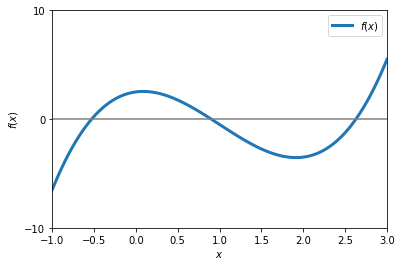

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define the polynomial function whose coefficients
#are optional parameters
def fun(x, a=2.0, b=-6, c=1, d=2.5):
    return a * x ** 3 + b * x ** 2 + c * x + d

def show_function_plot():
    x = np.linspace(-1, 3, 100)
    plt.plot(x, fun(x), label=r'$f(x)$', lw=3)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")
    plt.axhline(0, color='gray', lw=1.5)
    plt.yticks([-10, 0 , 10])
    plt.legend()
    plt.xlim(-1,3)
    plt.ylim(-10, 10)
    plt.show()
    
#plot the function to have an idea on where the roots are approximately    
show_function_plot()

[-0.52854363  0.89959512  2.62894851]
[-2.46469511e-13 -2.31814568e-13 -1.21236354e-12]


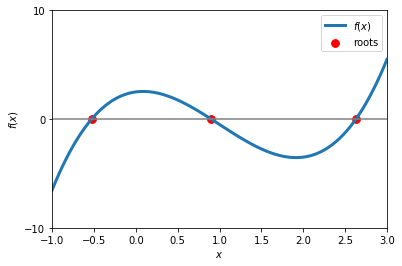

In [6]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define the polynomial function whose coefficients
#are optional parameters
def fun(x, a=2.0, b=-6, c=1, d=2.5):
    return a * x ** 3 + b * x ** 2 + c * x + d

#find the roots with the "root" function in scipy
sol = optimize.root(fun,[-0.5, 1.0, 2.5])  #initial guesses are x=-0.5, 1.0, and 2.5. 
print(sol.x)
print(fun(sol.x))

#plot the function
x = np.linspace(-1, 3, 100)
plt.plot(x, fun(x), label=r'$f(x)$', lw=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.axhline(0, color='gray', lw=1.5)
plt.yticks([-10, 0 , 10])
plt.xlim(-1,3)
plt.ylim(-10, 10)

#plot the roots as scatter
plt.scatter(sol.x, fun(sol.x), color="red",s=60, label=r'roots')

plt.legend()

plt.show()

The following example originally come from
https://sites.google.com/a/aims-senegal.org/scipy/roots-finding-numerical-integrations-and-differential-equations

In [7]:
#use Numpy's roots(...) function
p = [2,-6,1,2.5]
np.roots(p)

array([ 2.62894851,  0.89959512, -0.52854363])

In [8]:
def f(x):
    y = x + 2*np.cos(x)
    return y
         
#directly call SciPy optimize's bisect method
sol1=optimize.bisect(f, -2, 2)        # starting interval [-2, 2]

#directly call SciPy optimize's newton method
sol2=optimize.newton(f,  2)      # starting point x0 = 2

#use fsolve(...) function
sol3 = optimize.fsolve(f, 0.3) 

print(sol1)
print(sol2)
print(sol3[0])

-1.0298665293212252
-1.0298665293222615
-1.029866529322259


optimize's fsolve(...) can be used to solve a set of non-linear equations.

In [9]:
def func2(x):
        y = [x[0]*np.cos(x[1]) - 4, x[1]*x[0] - x[1] - 5]
        return y

sol4 = optimize.fsolve(func2, [1, 1])
print(sol4)

[6.50409711 0.90841421]
